In [53]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./dataset/apple_stock.csv')

In [5]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300


In [9]:
data.shape

(252, 7)

In [11]:
data.isnull()

,Date,Adj Close,Close,High,Low,Open,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False
249,False,False,False,False,False,False,False
250,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,252.0,1.990882e+02,2.151193e+01,1.645860e+02,1.822541e+02,1.923700e+02,2.216975e+02,2.364800e+02
Close,252.0,1.994543e+02,2.132157e+01,1.650000e+02,1.828525e+02,1.930850e+02,2.216975e+02,2.364800e+02
High,252.0,2.010931e+02,2.157143e+01,1.664000e+02,1.846175e+02,1.944000e+02,2.241500e+02,2.374900e+02
Low,252.0,1.976084e+02,2.096303e+01,1.640800e+02,1.814875e+02,1.917250e+02,2.197175e+02,2.344500e+02
Open,252.0,1.993160e+02,2.136548e+01,1.653500e+02,1.827775e+02,1.929900e+02,2.216350e+02,2.364800e+02
Volume,252.0,5.832214e+07,3.025771e+07,2.404830e+07,4.278855e+07,5.174865e+07,6.497460e+07,3.186799e+08


In [19]:
target_volumn = data.groupby('Volume').mean(numeric_only=True).round(2)

In [31]:
target_volumn

,Adj Close,Close,High,Low,Open
Volume,,,,,
24048300,189.25,189.97,190.90,189.25,190.87
28183500,229.04,229.04,229.50,227.17,227.78
28919300,192.32,193.05,193.89,192.83,193.61
30299000,226.51,226.51,227.17,225.45,225.77
30602200,227.18,227.18,227.28,223.89,226.76
...,...,...,...,...,...
163224100,182.92,183.38,187.00,182.66,186.65
172373300,206.91,207.15,207.16,193.63,193.65
198134300,212.82,213.07,220.20,206.90,207.37


In [43]:
data["adj close category"] = pd.cut(data["Adj Close"], bins=3, labels=["Low", "Medium", "High"])

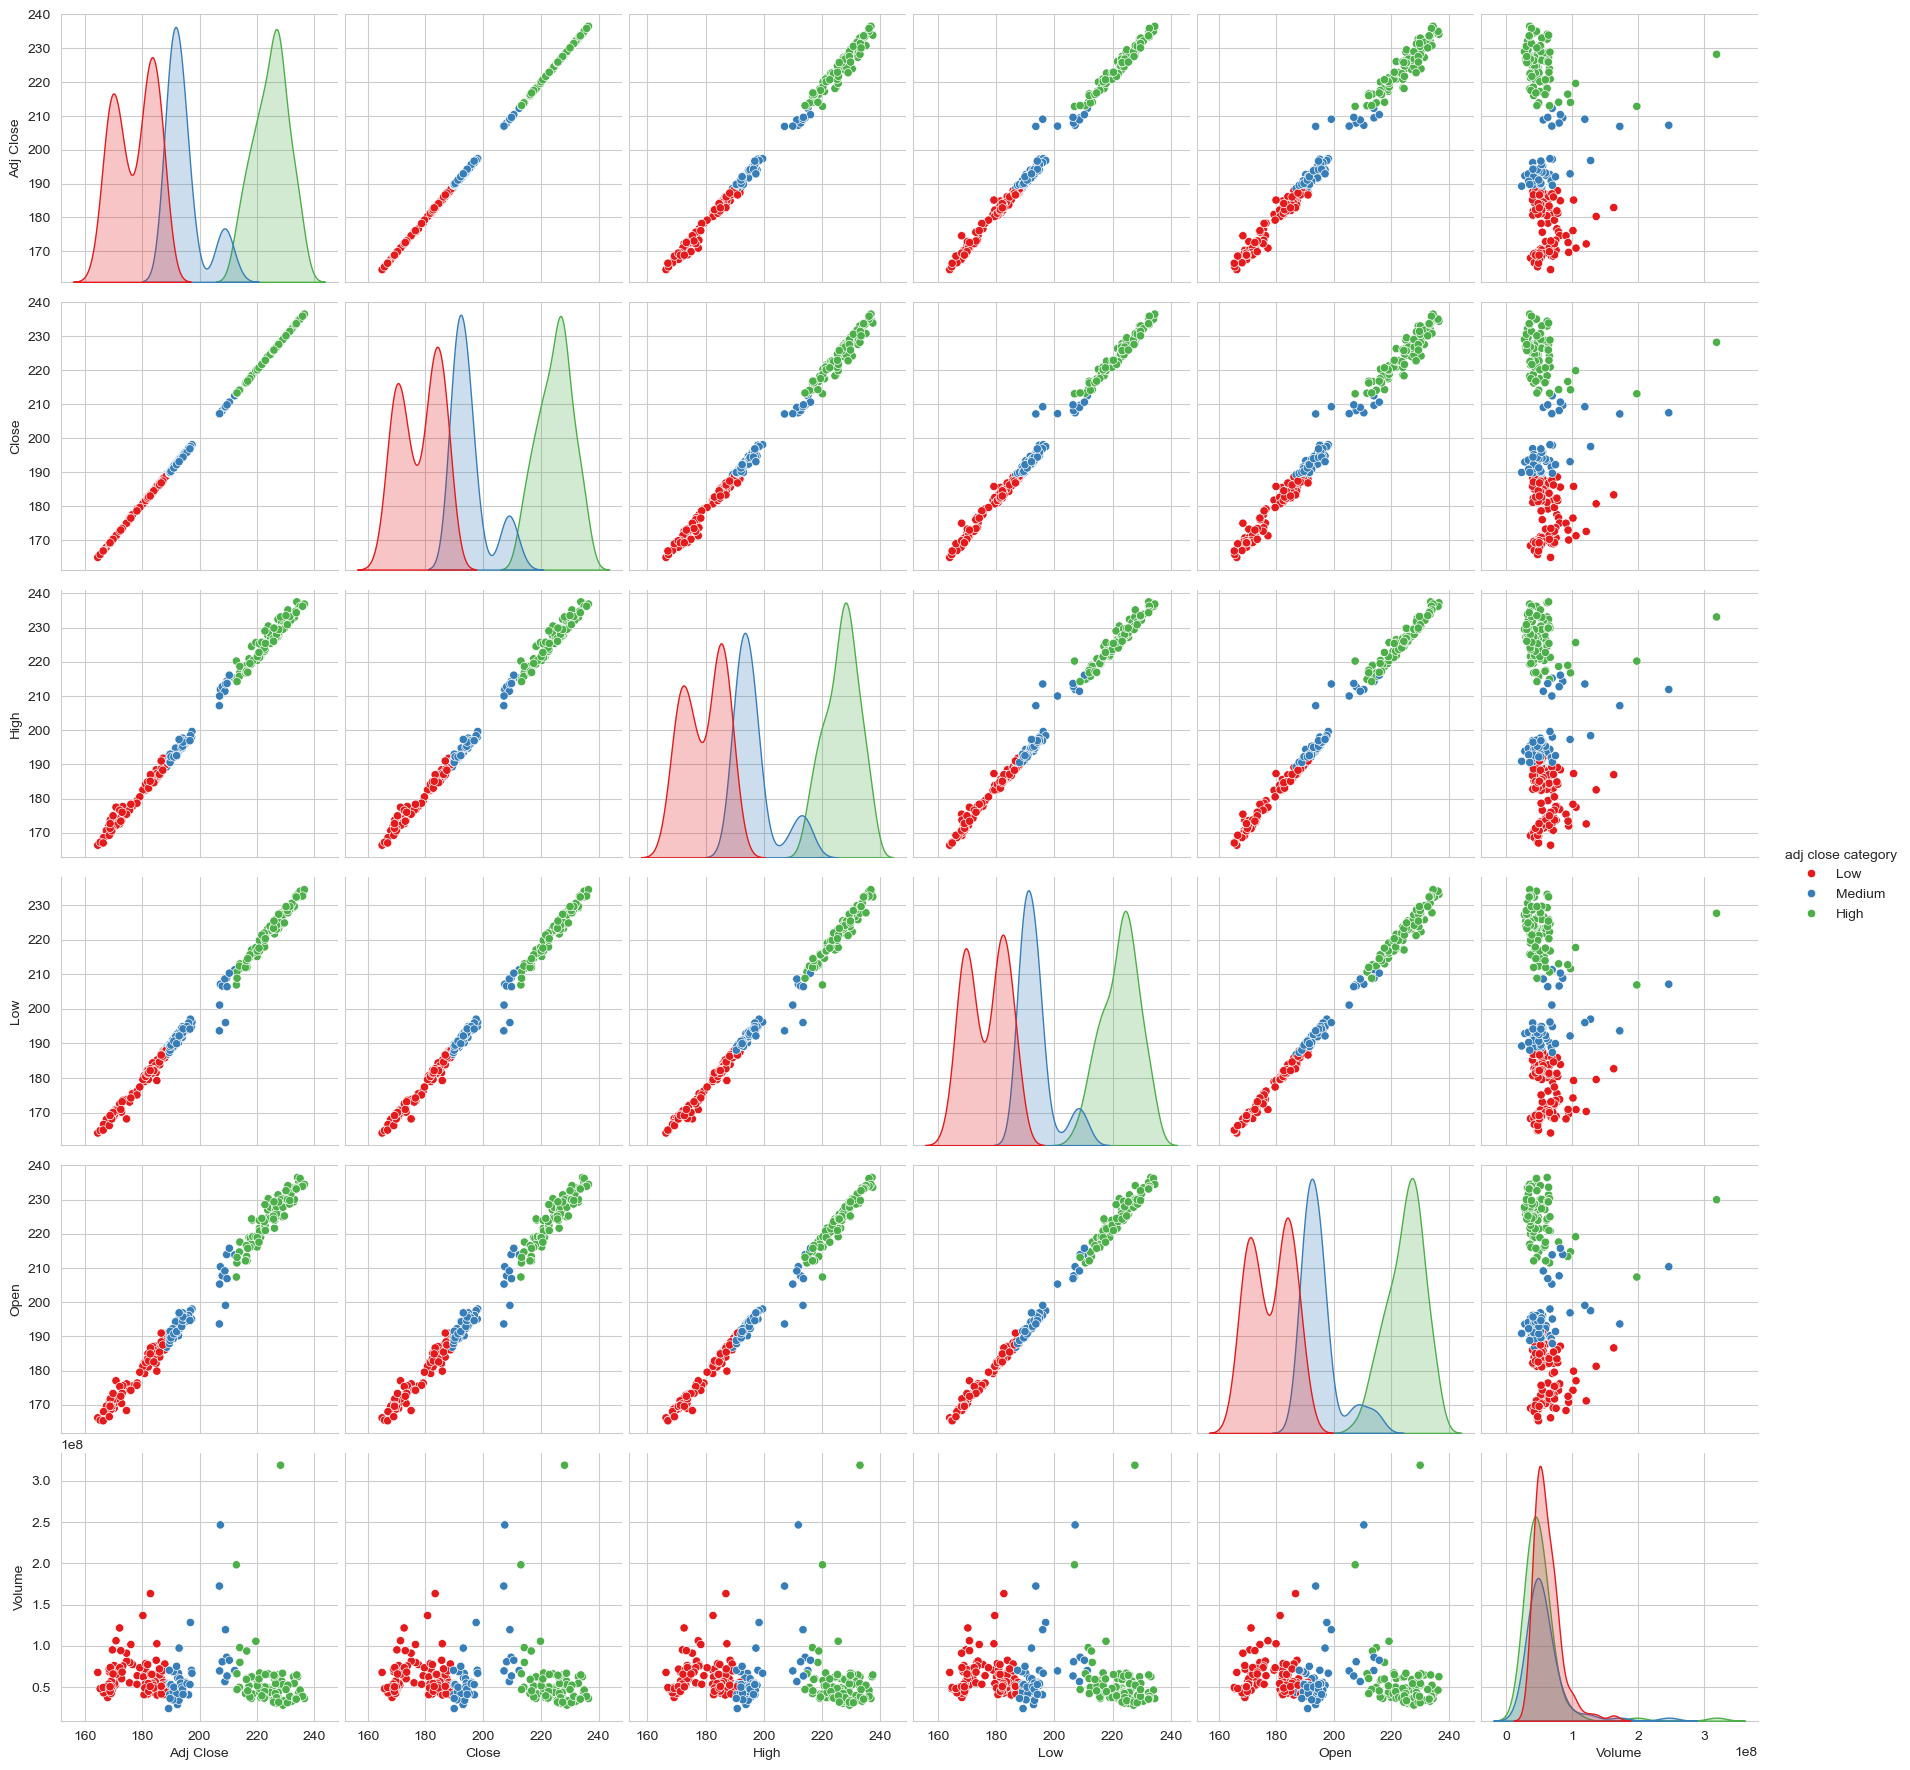

In [47]:
sns.set_style("whitegrid")
sns.pairplot(
    # data[["Adj Close", "Close", "High", "Low", "Open", "Volume"]],
    data[["Adj Close", "Close", "High", "Low", "Open", "Volume", "adj close category"]],
    hue = "adj close category",
    height = 3,
    palette = "Set1")
# data.pivot(["age", "bmi", "charges", "smoker"])

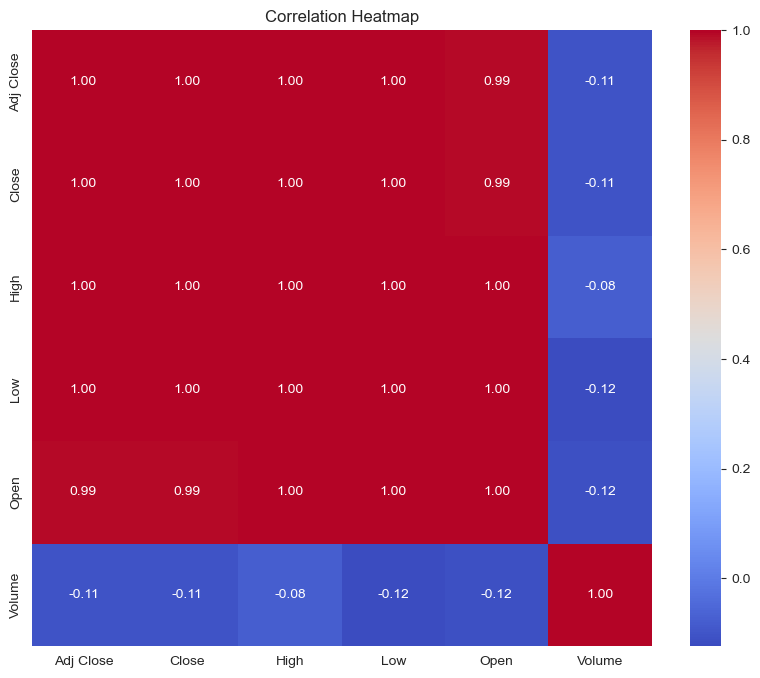

In [55]:
correlation_matrix = data.corr(numeric_only=True)
# Plot the heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjusts heatmap size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [57]:
print(correlation_matrix)

           Adj Close     Close      High       Low      Open    Volume
Adj Close   1.000000  0.999958  0.997834  0.997151  0.994280 -0.105114
Close       0.999958  1.000000  0.997783  0.997170  0.994248 -0.105376
High        0.997834  0.997783  1.000000  0.996285  0.996162 -0.080047
Low         0.997151  0.997170  0.996285  1.000000  0.997739 -0.124372
Open        0.994280  0.994248  0.996162  0.997739  1.000000 -0.115153
Volume     -0.105114 -0.105376 -0.080047 -0.124372 -0.115153  1.000000


In [51]:
print(data.select_dtypes(include=['number']).columns)

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [59]:
data = pd.get_dummies(data)

In [61]:
data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Date_2023-11-02 00:00:00+00:00', 'Date_2023-11-03 00:00:00+00:00',
       'Date_2023-11-06 00:00:00+00:00', 'Date_2023-11-07 00:00:00+00:00',
       ...
       'Date_2024-10-24 00:00:00+00:00', 'Date_2024-10-25 00:00:00+00:00',
       'Date_2024-10-28 00:00:00+00:00', 'Date_2024-10-29 00:00:00+00:00',
       'Date_2024-10-30 00:00:00+00:00', 'Date_2024-10-31 00:00:00+00:00',
       'Date_2024-11-01 00:00:00+00:00', 'adj close category_Low',
       'adj close category_Medium', 'adj close category_High'],
      dtype='object', length=261)

In [71]:
y = data["Adj Close"]
X = data.drop("Adj Close", axis = 1)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.80, 
    random_state = 1)

In [75]:
lr = LinearRegression()

In [77]:
lr.fit(X_train,y_train)

LinearRegression()

In [81]:
lr.fit(X_train, y_train)

# Calculate and round the score
score = round(lr.score(X_test, y_test), 3)
print(f"Model score: {score}")

Model score: 1.0
